In [ ]:
from utilities.plotting import plot 
import pandas as pd
from Filtering import ParticleFilter 
import time 
import numpy as np
import matplotlib.pyplot as plt
from utilities.utility import IPM
from utilities.CLI_parsing import parse
from utilities.user_data_gen import GenerateSimData

If you want to generate a simulated data set, first you must define a time varying $ \beta(t). $


Example: 

In [1]:

def beta(t):
        
    betaMax1=0.1
    theta=0

    return 0.1+betaMax1*(1.0-np.cos(theta+t/7/52*2*np.pi))  





Then we can call the function below to generate a time series of observations for the particle filter to test on. The hospitalization flag enables the SIRSH model, turning it off gives the basic SIRS model. Output of this function is saved to a series of files in ./data_sets named beta_test.csv, best_test_states.csv, and beta_test_beta.csv. 

beta_test.csv is the time series of observations we need for the particle filter. 

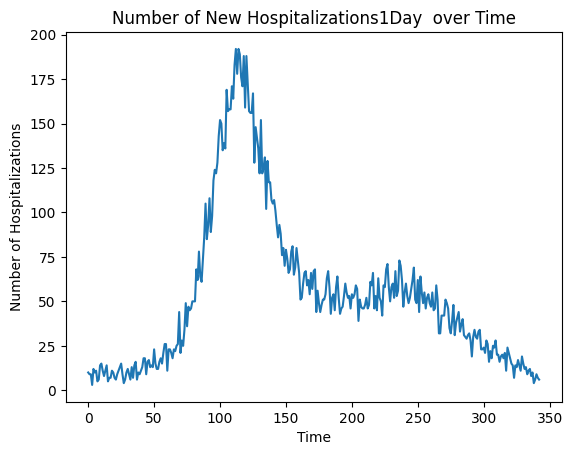

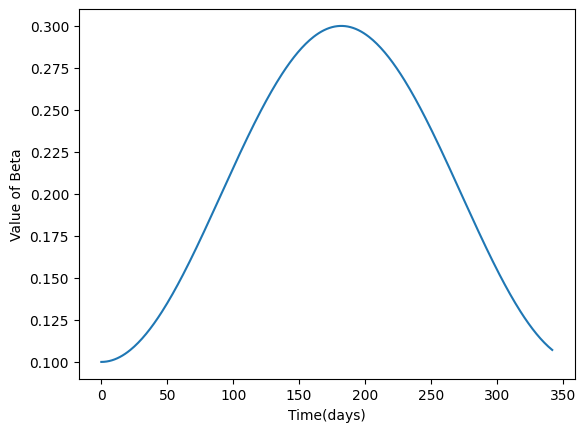

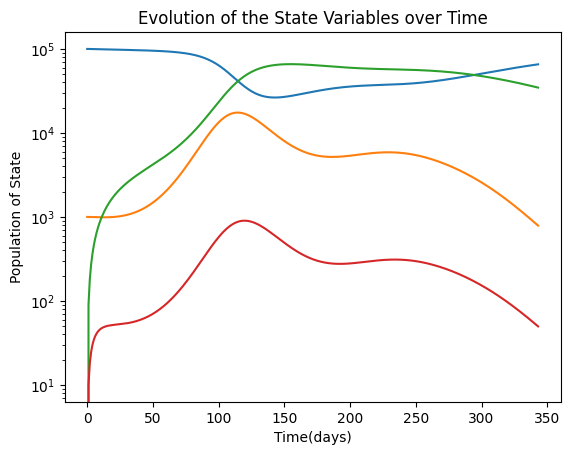

In [2]:
params = {"beta":beta,"gamma":0.1,"eta":0.1,"hosp":5.3,"L":90.0,"D":10.0}
initial_state = np.array([100000 ,1000,0,0]) 
time_series = 343

GenerateSimData(params,initial_state,time_series,hospitalization=True)



Now we can instantiate the ParticleFilter object, which encapsulates all of the algorithms operation. 
The fields are defined as follows:

beta_prior is the prior beta for the algorithm to estimate over. Practically speaking this doesn't really affect the algorithm so best to just leave it as is. 

population is the total estimated population of all states at time 0. This need not be perfectly accurate. 

hyperparameters are the $ \sigma_1 $ and $ \sigma_2 $ for the model. alpha is not in use. 

The init_seed_percent is the percent of initial population to classify as infected. np.random(0,population * init_seed_percent) is the initialization method

filePath is the path of the time series observations to estimate over. 

ipm is the ipm to use in modeling. Takes on values IPM.SIR, IPM.SIRS,IPM.SIRH

estimate_gamma is the gamma estimation flag, set to false to estimate beta

aggregate is how many days are represented by one data point in the time series

In [8]:
pf = ParticleFilter(beta_prior=[0.,1.],
                                  population=100000,
                                  num_particles=10000, 
                                  hyperparamters={"sigma1":0.01,"sigma2":0.1,"alpha":0.1},
                                  static_parameters={"gamma":0.1,"eta":0.1,"L":90.0,"D":10.0,"hosp":5.3}, 
                                  init_seed_percent=0.01,
                                  filePath='./data_sets/beta_test.csv',
                                  ipm=IPM.SIRH,
                                  estimate_gamma=False,
                                  aggregate=1) 

Call the function below to run the estimation algorithm. Pass in the length of your observation data as the argument. 

To call function on the real data, just replace beta_test.csv with FLU_HOSPITALIZATIONS.csv or any other csv file and set the parameter estimation to the length of the time series. 
See example below 

In [11]:
out = pf.estimate_params(223)

plot(out,0)  
#plot(out,1)   
plot(out,2) 

#Time series of beta for FFT 
beta = out.average_betas


Iteration:0 of 223
Iteration:1 of 223
Iteration:2 of 223
Iteration:3 of 223
Iteration:4 of 223
Iteration:5 of 223
Iteration:6 of 223
Iteration:7 of 223
Iteration:8 of 223


KeyboardInterrupt: 

Iteration:0 of 223
Iteration:1 of 223
Iteration:2 of 223
Iteration:3 of 223
Iteration:4 of 223
Iteration:5 of 223
Iteration:6 of 223
Iteration:7 of 223
Iteration:8 of 223
Iteration:9 of 223
Iteration:10 of 223
Iteration:11 of 223
Iteration:12 of 223
Iteration:13 of 223
Iteration:14 of 223
Iteration:15 of 223
Iteration:16 of 223
Iteration:17 of 223
Iteration:18 of 223
Iteration:19 of 223
Iteration:20 of 223
Iteration:21 of 223
Iteration:22 of 223
Iteration:23 of 223
Iteration:24 of 223
Iteration:25 of 223
Iteration:26 of 223
Iteration:27 of 223
Iteration:28 of 223
Iteration:29 of 223
Iteration:30 of 223
Iteration:31 of 223
Iteration:32 of 223
Iteration:33 of 223
Iteration:34 of 223
Iteration:35 of 223
Iteration:36 of 223
Iteration:37 of 223
Iteration:38 of 223
Iteration:39 of 223
Iteration:40 of 223
Iteration:41 of 223
Iteration:42 of 223
Iteration:43 of 223
Iteration:44 of 223
Iteration:45 of 223
Iteration:46 of 223
Iteration:47 of 223
Iteration:48 of 223
Iteration:49 of 223
Iteration:

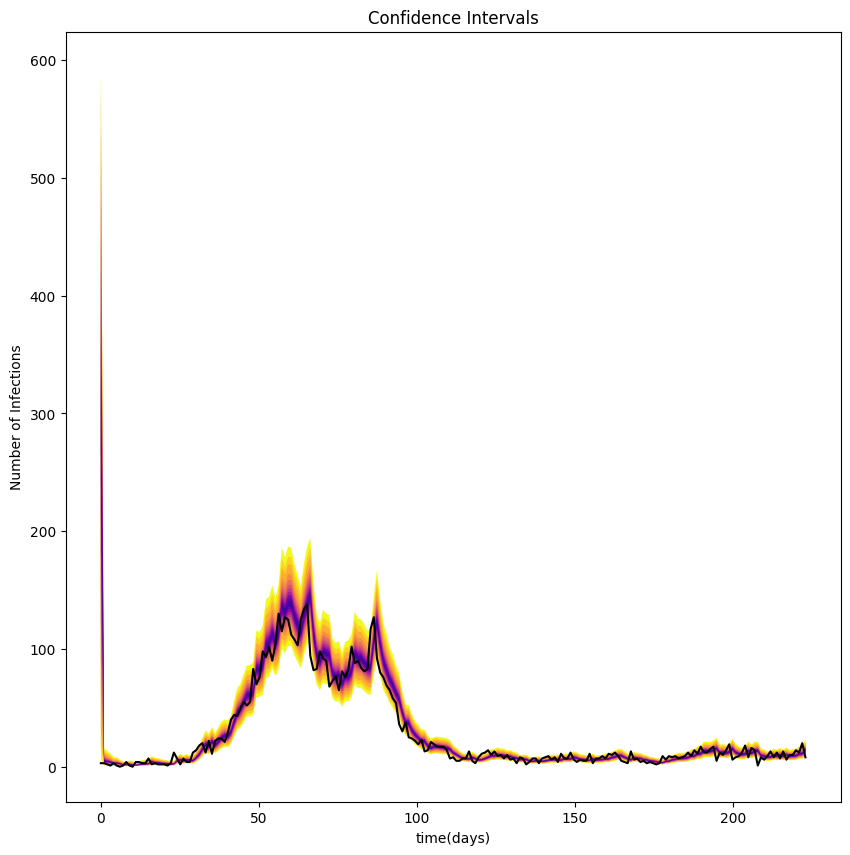

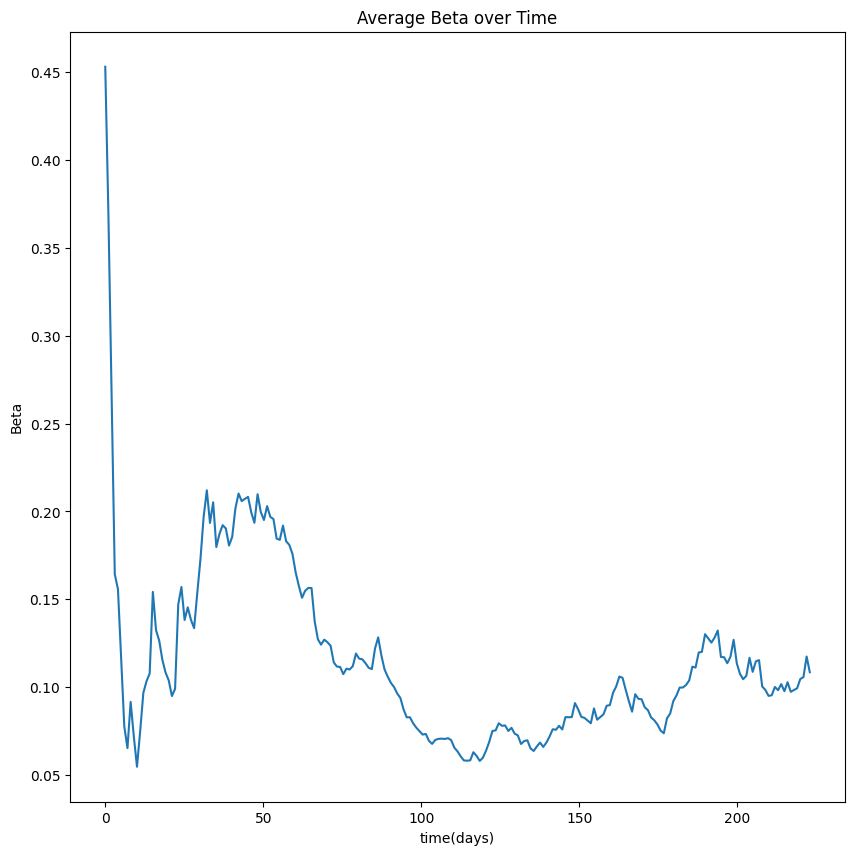

In [14]:
pf = ParticleFilter(beta_prior=[0.,1.],
                                  population=6000000,
                                  num_particles=10000, 
                                  hyperparamters={"sigma1":0.1,"sigma2":0.05,"alpha":0.1},
                                  static_parameters={"gamma":0.1,"eta":0.1,"L":90.0,"D":10.0,"hosp":5.3}, 
                                  init_seed_percent=0.01,
                                  filePath='./data_sets/FLU_HOSPITALIZATIONS.csv',
                                  ipm=IPM.SIRH,
                                  estimate_gamma=False,
                                  aggregate=1) 

out = pf.estimate_params(223)

plot(out,0)  
#plot(out,1)   
plot(out,2) 

#Time series of beta for FFT 
beta = out.average_betas
